In [12]:
from astropy.table import Table
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.optimize import fsolve
from pathlib import Path

In [13]:
#Definition
#Find the point inteception between two lines     
def findIntersection(m, y, m1, y1, x0):
    x = np.linspace(-10.0, 15.5, 200)
    return fsolve(lambda x : (m*x + y) - (m1*x + y1), x0)

In [15]:
# Readeing the file
dfCand = pd.read_csv("../GAIA-PS1-cans-new.csv")
tab = Table.from_pandas(dfCand)

tabTrue = Table.read("../True-PN-DR7LAMOST/DR7lamost-True-PN-duplicate-GAIA-PS1-final-saturated.ecsv", format="ascii.ecsv")
dfLP = pd.read_csv("../Likely-PN-DR7LAMOST/DR7lamost-Likely-PN-duplicate-GAIA-PS1.csv")

In [17]:
G_r = tab['Gmag'] - tab['rmag_x']
bp_rp = tab['BP-RP']

#applying the color criteria
c_eq1 = 0.84*bp_rp - 0.2
c_eq2 = -7*bp_rp + 23.5

mask = (G_r >= c_eq1) & (G_r <= c_eq2)
tab_f = tab[mask]

G_r_f = tab_f['Gmag'] - tab_f['rmag_x']
bp_rp_f = tab_f['BP-RP']

tab_f["G_r"] = G_r_f

In [18]:
# True
G_r_t = tabTrue['Gmag'] - tabTrue['rmag']
bp_rp_t = tabTrue['BP-RP']

In [19]:
# Likely
G_r_p = dfLP['Gmag'] - dfLP['rmag']
bp_rp_p = dfLP['BP-RP']

In [20]:
mask_inf = tab_f["G_r"] != float('inf')

In [21]:
# For lamost
n = len(tab_f["RAJ2000"])
print("Numbers:", n)
print("Objects:", tab_f["LAMOST"])
print("G-r:", tab_f["G_r"][mask_inf])

Numbers: 4
Objects:           LAMOST          
--------------------------
LAMOST J020808.63+491401.0
LAMOST J090602.63+311037.8
LAMOST J200023.21+424606.1
LAMOST J052527.51+105446.5
G-r:        G_r        
------------------
0.2943029999999993
1.7104759999999999
                --
 1.171005000000001


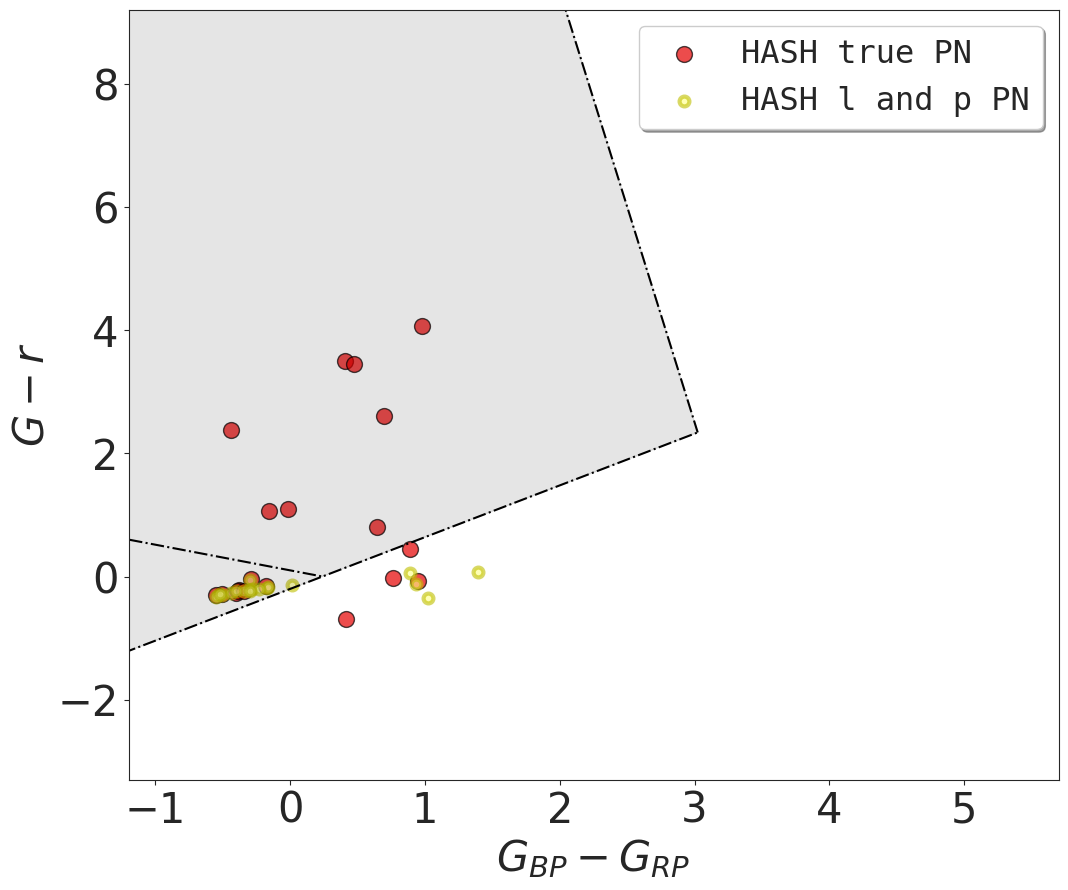

In [37]:
#Plotting
lgd_kws = {'frameon': True, 'fancybox': True, 'shadow': True}
sns.set_style('ticks')
fig, ax = plt.subplots(figsize=(12, 10))
plt.tick_params(axis='x', labelsize=30) 
plt.tick_params(axis='y', labelsize=30)
plt.xlabel(r'$G_{BP} - G_{RP}$', fontsize=30)
plt.ylabel(r'$G - r$', fontsize=30)
ax.set_xlim(-1.2, 5.7)
ax.set_ylim(-3.3, 9.2)
#ax.set_xlim(0, 2)
#ax.set_ylim(-2, 2)
#fig = plt.figure(figsize=(10, 8))
#ax = fig.add_subplot(111)
#ax.scatter(bp_rp_f, G_r_f, s=150, c = sns.xkcd_palette(["denim blue"]), edgecolors= "b", zorder = 1, lw=3, alpha = 0.7, label = "PN candidates")
ax.scatter(bp_rp_t, G_r_t, s=130, c = sns.xkcd_palette(["red"]), edgecolors= "k", zorder = 1, lw=1, alpha = 0.7, label = "HASH true PN")
ax.scatter(bp_rp_p, G_r_p, s=50, c = sns.xkcd_palette(["pale yellow"]), edgecolors= "y", zorder = 1, lw=3, alpha = 0.6, label = "HASH l and p PN")

# Region where are located the PNe
result = findIntersection(0.84, -0.2, -7, 23.5, 0.0)
result1 = findIntersection(0.84, -0.2, -5/12, 0.1, 0.0)

x_new = np.linspace(-15.5, result,  200)
x_new1 = np.linspace(-15.5, result1,  200)
y = 0.84*x_new - 0.2
yy = -7*x_new + 23.5
yyy = (-5/12)*x_new1 + 0.1
#Mask
#mask = y >= result_y - 0.5
ax.plot(x_new, y, color='k', linestyle='-.')
ax.plot(x_new, yy, color='k', linestyle='-.')
ax.plot(x_new1, yyy, color='k', linestyle='-.')

#reshape
x_new = x_new.ravel()
y = y.ravel()
yy = yy.ravel()
plt.fill_between(x_new, y, yy, color="k", alpha=0.1)

#bbox_props = dict(boxstyle="round", fc="w", ec="0.78", alpha=0.1, pad=0.1)
#for label_, x, y in zip(tab_f["LAMOST"], bp_rp_f, G_r_f):
#    ax.annotate(label_.split("T ")[-1], (x, y), alpha=0.8, size=15,
#                   xytext=(155.0, 10), textcoords='offset points', ha='right', va='bottom', bbox=bbox_props, zorder=100)

# True
# for label_, x, y in zip(tabTrue["FileName"], bp_rp_t, G_r_t):
#     ax.annotate(label_.split(".fit")[0], (x, y), alpha=1, size=15,
#                    xytext=(155.0, 10), textcoords='offset points', ha='right', va='bottom', bbox=bbox_props, zorder=100)

#for label_, x, y in zip(dfLP["FileName"], bp_rp_p, G_r_p):
    #ax.annotate(label_.split(".fit")[0], (x, y), alpha=1, size=15,
                   #xytext=(155.0, 10), textcoords='offset points', ha='right', va='bottom', bbox=bbox_props, zorder=100)

ax.legend(prop={'family': 'monospace', 'size': 23}, loc="upper right", **lgd_kws)